In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mysql.connector

In [3]:
import mysql.connector
mydb= mysql.connector.connect(host='localhost',user='root',passwd='sawan',database='classicmodels')

In [4]:
cursordb= mydb.cursor()

In [5]:
cursordb.execute('show tables;')
cursordb.fetchall()

[('customers',),
 ('employees',),
 ('offices',),
 ('orderdetails',),
 ('orders',),
 ('payments',),
 ('productlines',),
 ('products',)]

In [6]:
cursordb.execute('select * from offices;')
offices_col= cursordb.column_names 
offices= cursordb.fetchall()
offices= pd.DataFrame(offices,columns=offices_col)

In [7]:
offices.head()

,officeCode,city,phone,addressLine1,addressLine2,state,country,postalCode,territory
0,1,San Francisco,+1 650 219 4782,100 Market Street,Suite 300,CA,USA,94080,NA
1,2,Boston,+1 215 837 0825,1550 Court Place,Suite 102,MA,USA,02107,NA
2,3,NYC,+1 212 555 3000,523 East 53rd Street,apt. 5A,NY,USA,10022,NA
3,4,Paris,+33 14 723 4404,43 Rue Jouffroy D'abbans,None,None,France,75017,EMEA
4,5,Tokyo,+81 33 224 5000,4-1 Kioicho,None,Chiyoda-Ku,Japan,102-8578,Japan


In [8]:
cursordb.execute('select * from employees;')
employees_col= cursordb.column_names
employees= cursordb.fetchall()
employees= pd.DataFrame(employees,columns=employees_col)

In [9]:
employees.head()

,employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle
0,1002,Murphy,Diane,x5800,dmurphy@classicmodelcars.com,1,NaN,President
1,1056,Patterson,Mary,x4611,mpatterso@classicmodelcars.com,1,1002.0,VP Sales
2,1076,Firrelli,Jeff,x9273,jfirrelli@classicmodelcars.com,1,1002.0,VP Marketing
3,1088,Patterson,William,x4871,wpatterson@classicmodelcars.com,6,1056.0,Sales Manager (APAC)
4,1102,Bondur,Gerard,x5408,gbondur@classicmodelcars.com,4,1056.0,Sale Manager (EMEA)


In [10]:
cursordb.execute('select * from customers;')
customers_col= cursordb.column_names
customers= cursordb.fetchall()
customers= pd.DataFrame(customers,columns=customers_col)
customers.head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.00
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800.00
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.00
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.00
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700.00


In [11]:
cursordb.execute('select * from orderdetails;')
orderdetails_col= cursordb.column_names
orderdetails= cursordb.fetchall()
orderdetails= pd.DataFrame(orderdetails,columns=orderdetails_col)
orderdetails.head()

,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
0,10100,S18_1749,30,136.00,3
1,10100,S18_2248,50,55.09,2
2,10100,S18_4409,22,75.46,4
3,10100,S24_3969,49,35.29,1
4,10101,S18_2325,25,108.06,4


In [12]:
cursordb.execute('select * from orders;')
orders_col= cursordb.column_names
orders= cursordb.fetchall()
orders= pd.DataFrame(orders,columns=orders_col)
orders.head()

,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
1,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
2,10102,2003-01-10,2003-01-18,2003-01-14,Shipped,None,181
3,10103,2003-01-29,2003-02-07,2003-02-02,Shipped,None,121
4,10104,2003-01-31,2003-02-09,2003-02-01,Shipped,None,141


In [13]:
cursordb.execute('select * from products;')
products_col= cursordb.column_names
products= cursordb.fetchall()
products= pd.DataFrame(products,columns=products_col)
products.head()

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00


In [14]:
cursordb.execute('select * from payments;')
payments_col= cursordb.column_names
payments= cursordb.fetchall()
payments= pd.DataFrame(payments,columns=payments_col)
payments.head()

,customerNumber,checkNumber,paymentDate,amount
0,103,HQ336336,2004-10-19,6066.78
1,103,JM555205,2003-06-05,14571.44
2,103,OM314933,2004-12-18,1676.14
3,112,BO864823,2004-12-17,14191.12
4,112,HQ55022,2003-06-06,32641.98


In [15]:
offices.isnull().sum()

officeCode      0
city            0
phone           0
addressLine1    0
addressLine2    2
state           3
country         0
postalCode      0
territory       0
dtype: int64

In [16]:
employees.isnull().sum()

employeeNumber    0
lastName          0
firstName         0
extension         0
email             0
officeCode        0
reportsTo         1
jobTitle          0
dtype: int64

In [17]:
customers.isnull().sum()

customerNumber              0
customerName                0
contactLastName             0
contactFirstName            0
phone                       0
addressLine1                0
addressLine2              100
city                        0
state                      73
postalCode                  7
country                     0
salesRepEmployeeNumber     22
creditLimit                 0
dtype: int64

In [18]:
orderdetails.isnull().sum()

orderNumber        0
productCode        0
quantityOrdered    0
priceEach          0
orderLineNumber    0
dtype: int64

In [19]:
orders.isnull().sum()

orderNumber         0
orderDate           0
requiredDate        0
shippedDate        14
status              0
comments          246
customerNumber      0
dtype: int64

In [20]:
products.isnull().sum()

productCode           0
productName           0
productLine           0
productScale          0
productVendor         0
productDescription    0
quantityInStock       0
buyPrice              0
MSRP                  0
dtype: int64

In [21]:
payments.isnull().sum()

customerNumber    0
checkNumber       0
paymentDate       0
amount            0
dtype: int64

In [22]:
customers.shape

(122, 13)

In [23]:
products.shape

(110, 9)

# EDA

In [24]:
# Get the product wise total quantity ordered (top 10 product ordered)
cursordb.execute(' SELECT p.productname, Sum(od.quantityordered) \
                   FROM   classicmodels.orderdetails \
                   od INNER JOIN classicmodels.products p \
                   ON p.productcode = od.productcode GROUP  BY 1 order by 2 desc limit 10; ')
col_name=cursordb.column_names
data= cursordb.fetchall()
product_quantity=pd.DataFrame(data,columns=col_name)

In [25]:
product_quantity.head()

,productname,Sum(od.quantityordered)
0,1992 Ferrari 360 Spider red,1808
1,1937 Lincoln Berline,1111
2,American Airlines: MD-11S,1085
3,1941 Chevrolet Special Deluxe Cabriolet,1076
4,1930 Buick Marquette Phaeton,1074


Fetched highest demanded products

Now look for each product class contribution in sales

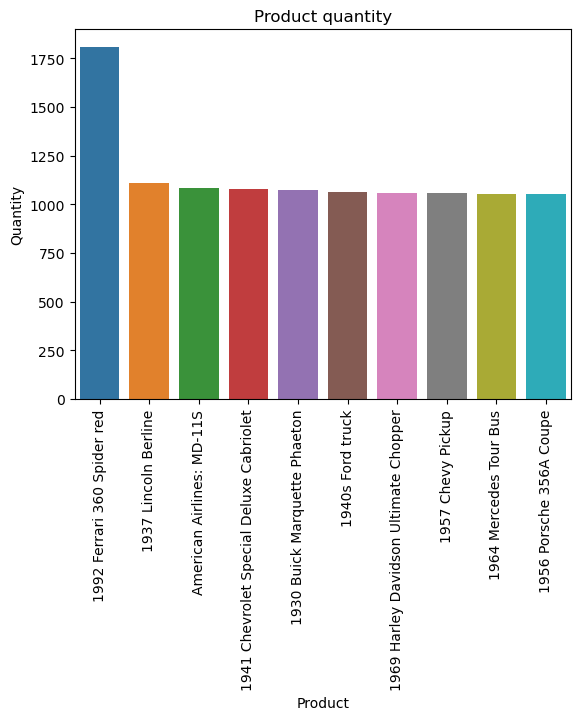

In [26]:
sns.barplot(x = 'productname', y = 'Sum(od.quantityordered)', data= product_quantity)
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Product quantity')
plt.xticks(rotation=90)
plt.show()

In [27]:
# Now look for top 10 product contribution in revenue

In [27]:
cursordb.execute(' SELECT p.productname, sum(od.quantityOrdered * od.priceEach) as total_revenue_by_product \
                   FROM   classicmodels.orderdetails \
                   od INNER JOIN classicmodels.products p \
                   ON p.productcode = od.productcode GROUP  BY 1 order by 2 desc limit 10; ')
col_name=cursordb.column_names

data= cursordb.fetchall()
product_revenue= pd.DataFrame(data, columns= col_name )

In [28]:
product_revenue

,productname,total_revenue_by_product
0,1992 Ferrari 360 Spider red,276839.98
1,2001 Ferrari Enzo,190755.86
2,1952 Alpine Renault 1300,190017.96
3,2003 Harley-Davidson Eagle Drag Bike,170686.00
4,1968 Ford Mustang,161531.48
5,1969 Ford Falcon,152543.02
6,1980s Black Hawk Helicopter,144959.91
7,1998 Chrysler Plymouth Prowler,142530.63
8,1917 Grand Touring Sedan,140535.60
9,2002 Suzuki XREO,135767.03


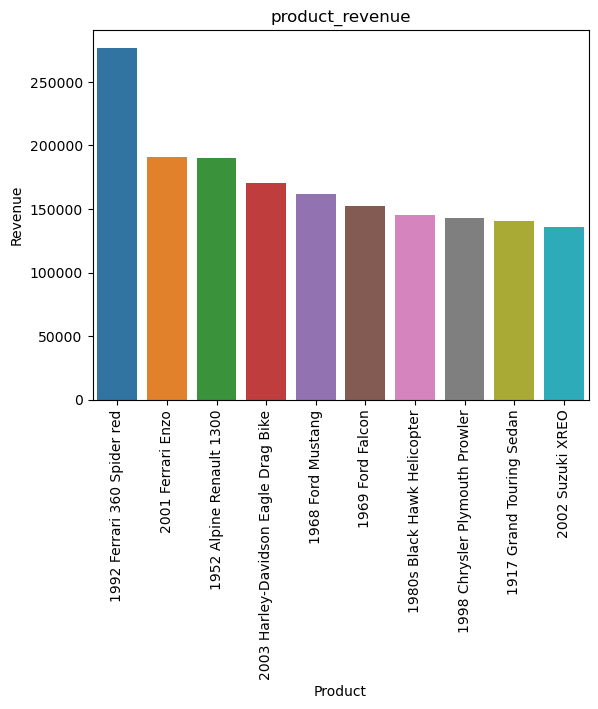

In [29]:
sns.barplot(x = 'productname', y = 'total_revenue_by_product', data= product_revenue)
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('product_revenue')
plt.xticks(rotation=90)
plt.show()

In [31]:
# Get the status distribution of orders

In [30]:
cursordb.execute('select status, count(distinct orderNumber)as count_orders \
                from orders \
                group by status')
data= cursordb.fetchall()
col_name= cursordb.column_names
order_status= pd.DataFrame(data, columns = col_name)


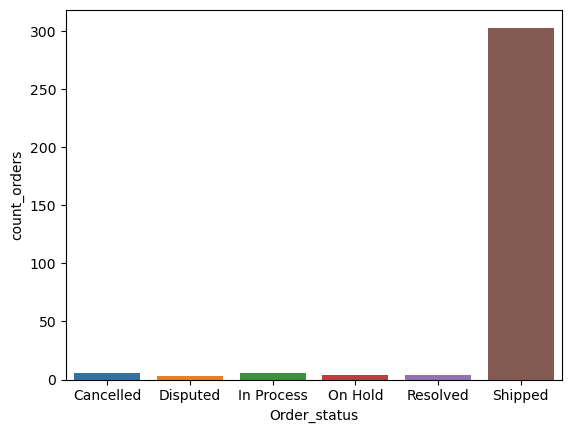

In [31]:
sns.barplot(y = 'count_orders',x= 'status', data=order_status)
plt.xlabel('Order_status')
plt.ylabel('count_orders')
plt.show()

In [ ]:
# Customers distribution by country

In [32]:
# TOP 5 country by customers
cursordb.execute( " select country,count( distinct customerNumber) as cnt \
                  from customers\
                  group by 1 order by 2 desc limit 5")
data= cursordb.fetchall()
country_wise_customers= pd.DataFrame(data)

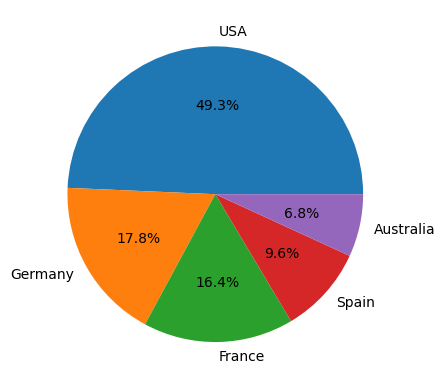

In [33]:
plt.pie(country_wise_customers[1],labels=country_wise_customers[0],autopct='%.1f%%')
plt.show()

### Month Wise orders

In [39]:
cursordb.execute("select date_format(orderDate, '%Y-%m') date , count( distinct orderNumber) as cnt \
                  from classicmodels.orders \
                 group by 1")
data= cursordb.fetchall()
col_name= cursordb.column_names
month_wise_order= pd.DataFrame(data, columns = col_name)

In [40]:
month_wise_order

,date,cnt
0,2003-01,5
1,2003-02,3
2,2003-03,6
3,2003-04,7
4,2003-05,6
5,2003-06,7
6,2003-07,7
7,2003-08,5
8,2003-09,8
9,2003-10,18


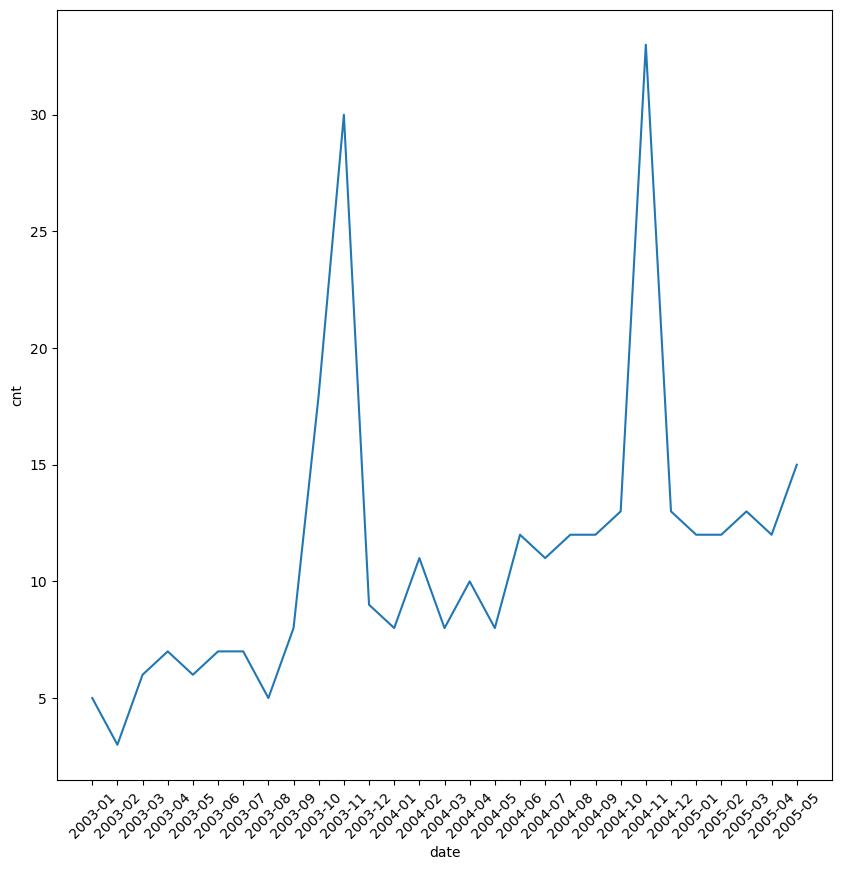

In [42]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.lineplot(data= month_wise_order, x= 'date' , y= 'cnt')
plt.show()